## Desenvolvimento

In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [174]:
file_torneira1 = 'torneira1.xlsx'
file_torneira2 = 'torneira2.xlsx'

torneira1_df = pd.read_excel(file_torneira1)
torneira2_df = pd.read_excel(file_torneira2)

In [161]:
LIE = 215
LSE = 225
D2 = 2.33

In [162]:
def media_colunas(df):
    media_colunas = df.mean()
    return media_colunas.to_numpy().mean()

def diferenca_colunas(df):
    diferenca_colunas = df.max() - df.min()
    return diferenca_colunas.to_numpy().mean()

In [163]:
def calcular_cp(df):
    diferenca = diferenca_colunas(df)
    sigma = diferenca / D2
    cp = (LSE - LIE) / (6 * sigma)
    return cp

def calcular_cpk(df):
    media = media_colunas(df)
    diferenca = diferenca_colunas(df)
    sigma = diferenca / D2
    cpk = min((LSE - media) / (3 * sigma), (media - LIE) / (3 * sigma))
    return cpk

In [164]:
def calcular_pp(df):
    media = media_colunas(df)
    df_flat = df.to_numpy().flatten()
    desvio_padrao = df_flat.std(ddof=1)
    pp = (LSE - LIE) / (6 * desvio_padrao)
    return pp

def calcular_ppk(df):
    media = media_colunas(df)
    df_flat = df.to_numpy().flatten()
    desvio_padrao = df_flat.std(ddof=1)
    ppk = min((LSE - media) / (3 * desvio_padrao), (media - LIE) / (3 * desvio_padrao))
    return ppk

In [165]:
def calcular_dados(df):
    resultados = {
        'Cp': calcular_cp(df),
        'Cpk': calcular_cpk(df),
        'Pp': calcular_pp(df),
        'Ppk': calcular_ppk(df)
    }
    resultados_df = pd.DataFrame(resultados, index=['Valor'])
    return resultados_df

In [166]:
def avaliar_capacidade(df):
    resultados = calcular_dados(df)
    cp = resultados['Cp']['Valor']
    cpk = resultados['Cpk']['Valor']
    pp = resultados['Pp']['Valor']
    ppk = resultados['Ppk']['Valor']

    analise = {}

    # Avaliação da capacidade do processo
    if cp >= 1.33 and cpk >= 1.33:
        analise['Capacidade'] = 'O processo é capaz.'
    elif cp >= 1.33 and cpk < 1.33:
        analise['Capacidade'] = 'O processo é capaz, mas há problema de centralização.'
    elif cp < 1.33 and cpk >= 1.33:
        analise['Capacidade'] = 'O processo tem variabilidade alta, mas a centralização está adequada.'
    else:
        analise['Capacidade'] = 'O processo não é capaz devido à variabilidade e à centralização.'

    # Avaliação da variabilidade (Cp e Pp)
    if cp < 1.33:
        analise['Variabilidade'] = 'Há alta variabilidade no processo.'
    else:
        analise['Variabilidade'] = 'A variabilidade está dentro do limite aceitável.'

    # Avaliação da centralização (Cpk e Ppk)
    if cpk < 1.33:
        analise['Centralização'] = 'Há problema de centralização.'
    else:
        analise['Centralização'] = 'A centralização está adequada.'

    # Avaliação geral (Pp e Ppk)
    if pp < 1.33 or ppk < 1.33:
        analise['Desempenho'] = 'O desempenho do processo pode ser melhorado.'
    else:
        analise['Desempenho'] = 'O desempenho do processo está adequado.'

    return pd.DataFrame.from_dict(analise, orient='index', columns=['Avaliação'])

In [167]:
def gerar_histograma(df):
    alvo = int(LIE + (LSE - LIE) / 2)
    df_flat = df.to_numpy().flatten()
    plt.hist(df_flat, bins=20, edgecolor='black', alpha=0.7)
    plt.axvline(alvo, color='green', linestyle='dashed', linewidth=2, label=f'Alvo = {alvo}ml')
    plt.axvline(LIE, color='red', linestyle='dashed', linewidth=2, label=f'LIE = {LIE}ml')
    plt.axvline(LSE, color='red', linestyle='dashed', linewidth=2, label=f'LSE = {LSE}ml')
    plt.title('Distribuição de Volumes de Preenchimento')
    plt.xlabel('Volume (ml)')
    plt.ylabel('Frequência')
    plt.legend()
    plt.show()

## Avaliação - Torneira 1

In [168]:
calcular_dados(torneira1_df)

,Cp,Cpk,Pp,Ppk
Valor,0.478243,0.37456,0.502783,0.39378


In [169]:
avaliar_capacidade(torneira1_df)

,Avaliação
Capacidade,O processo não é capaz devido à variabilidade ...
Variabilidade,Há alta variabilidade no processo.
Centralização,Há problema de centralização.
Desempenho,O desempenho do processo pode ser melhorado.


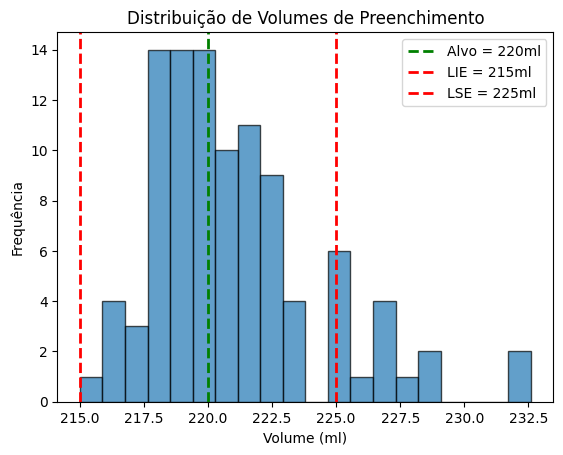

In [170]:
gerar_histograma(torneira1_df)

## Avaliação - Torneira 2

In [171]:
calcular_dados(torneira2_df)

,Cp,Cpk,Pp,Ppk
Valor,0.751128,0.729045,0.781832,0.758846


In [172]:
avaliar_capacidade(torneira2_df)

,Avaliação
Capacidade,O processo não é capaz devido à variabilidade ...
Variabilidade,Há alta variabilidade no processo.
Centralização,Há problema de centralização.
Desempenho,O desempenho do processo pode ser melhorado.


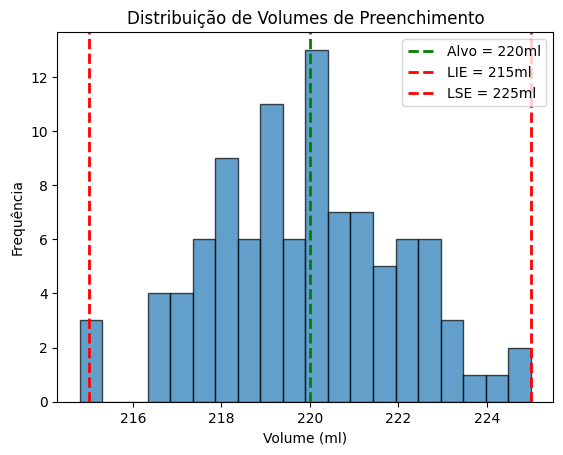

In [173]:
gerar_histograma(torneira2_df)